#                                    Collecting Data from YouTube


<img src = "pictures\youtube.jpg">

# Why Collect Data from YouTube?
+ 2nd largest social media platform
+ Large amounts of data per video
+ Data from youtube can be used for multiple different applications
+ Its really not the difficult!!

# What is Included in this Tutorial?
### Within this tutorial, I will show you how to obtain an API from Google for collecting data off of YouTube (Google Owns YouTube).  
### Next, I will go through the steps to show you how to create a youtube search.py file that you can use within jupyter notebook to extract data into a data frame
### Lastly, I will show you a way to extract geographic information from each video that you collected, so later down the road you can perform geographic analysis

# Step 1
### First things first, you have to have a YouTube API to be able to perform any of these functions.
+ Go to https://developers.google.com/ and sign in under your google account
+ Go to the bottem of the screen and click on 'Google API Console'
+ Click on the drop down area in the picture below to create a new project
<img src = "pictures\step1.png">
# Click the 'Plus Sign', and create a name for your project (whatever you want) and click create!
<img src = "pictures\step2.png">
<img src = "pictures\step3.png">

# Next, you need to enable YouTube Data API V3
+ On the left side of the page click "Library"
+ Scroll down until you find YouTube Data API V3, click on it
+ Click on Enable

# Lastly, you will create your credentials/create your key
+ Make sure the project is selected from the drop down arrow from the start
+ Click on "Credentials on the left side of the page
+ Click on "Create Credentials" and select "API Key"
+ Once you do this, you will notice that your API key has been created and you will need that here in the near future!
<img src = "pictures\step4.png">

# To be able to you the API in Python, go to your command prompt and install the API Python Client with the following code:
+ pip install --upgrade google-api-python-client
# Now you ready for the fun stuff!  There is also a ton of information within the Google Developers website, so be sure to take a look around!

# ****This part is very important!  This string of code below is the code you will need to be able to extract specific data from youtube.  This string of code will allow you to type in a 'youtube search' and it will extract vidoes related with that search and pul specific information from each video.  Within the code, I will briefly explain parts of it.  What you need to do with this box of code is copy and paste into a jupyter notebook and then download it into a py file, within the same folder you are working out of!  You download it into a py file once you make any changes to it, for instance entering your API KEY and deleting anything inbetween the hashtags (my brief descriptions)!  You can extract different data from the videos in different ways, this is just one way that I found that makes it quite easy!

# Once you download the above code into a py. file into the same folder you are working out of, its time to make the magic happen!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### This is importing your "youtube_search" from the py. file that you just created! Critical import ###
from youtube_data import youtube_search

In [2]:
### Here, we are using the "youtube_search" function and searching for videos related to "Battle Front 2"  and saved it to a varible
test = youtube_search("Battle Front 2")
test.keys()

['dislikeCount',
 'tags',
 'channelId',
 'videoId',
 'likeCount',
 'commentCount',
 'viewCount',
 'title',
 'channelTitle',
 'favoriteCount',
 'categoryId']

In [3]:
test['commentCount'][:5]

[u'11633', u'8817', u'2092', u'9603', u'9918']

In [4]:
### Here we are taking the data from the 50 videos that we collected and converting it into good ole Data Frame

df = pd.DataFrame(data=test)
df.head()

,categoryId,channelId,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,tags,title,videoId,viewCount
0,20,UCOsVSkmXD1tc6uiJ2hc0wYQ,EA Star Wars,11633,2626,0,59588,"[star wars, battlefront 2, star wars battlefro...",Star Wars Battlefront 2 Single Player Trailer,FNUTWw17rkM,4387550
1,20,UCpqXJOEqGS-TCnazcHCo0rA,theRadBrad,8817,641,0,54181,"[Star Wars Battlefront 2, BF2, Star Wars BF2, ...",STAR WARS BATTLEFRONT 2 Walkthrough Gameplay P...,PFD0-BPVZ6U,1089640
2,20,UCw7FkXsC00lH2v2yB5LQoYA,jackfrags,2092,556,0,19903,"[Star Wars Battlefront II, star wars, battlefr...",BETA GAMEPLAY + TIPS - Star Wars Battlefront II,db8ostiGgAY,781766
3,20,UCOsVSkmXD1tc6uiJ2hc0wYQ,EA Star Wars,9603,1722,0,53123,"[star wars, battlefront 2, star wars battlefro...",Star Wars Battlefront 2 Launch Trailer,Uvmx94cUVEY,2586926
4,20,UCw7FkXsC00lH2v2yB5LQoYA,jackfrags,9918,1361,0,67064,"[star wars battlefront 2, star wars battlefron...",STAR WARS BATTLEFRONT 2 - Multiplayer Gameplay,zlxyhnuYwl4,3208193


In [5]:
df.count()

categoryId       50
channelId        50
channelTitle     50
commentCount     50
dislikeCount     50
favoriteCount    50
likeCount        50
tags             50
title            50
videoId          50
viewCount        50
dtype: int64

In [6]:
### Here, we are just changing around the columns to make more sense and easier to read, also here you can change column names.

df1 = df[['title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']]
df1.columns = ['Title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']
df1.head()

,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
0,Star Wars Battlefront 2 Single Player Trailer,4387550,EA Star Wars,11633,59588,2626,"[star wars, battlefront 2, star wars battlefro...",0,FNUTWw17rkM,UCOsVSkmXD1tc6uiJ2hc0wYQ,20
1,STAR WARS BATTLEFRONT 2 Walkthrough Gameplay P...,1089640,theRadBrad,8817,54181,641,"[Star Wars Battlefront 2, BF2, Star Wars BF2, ...",0,PFD0-BPVZ6U,UCpqXJOEqGS-TCnazcHCo0rA,20
2,BETA GAMEPLAY + TIPS - Star Wars Battlefront II,781766,jackfrags,2092,19903,556,"[Star Wars Battlefront II, star wars, battlefr...",0,db8ostiGgAY,UCw7FkXsC00lH2v2yB5LQoYA,20
3,Star Wars Battlefront 2 Launch Trailer,2586926,EA Star Wars,9603,53123,1722,"[star wars, battlefront 2, star wars battlefro...",0,Uvmx94cUVEY,UCOsVSkmXD1tc6uiJ2hc0wYQ,20
4,STAR WARS BATTLEFRONT 2 - Multiplayer Gameplay,3208193,jackfrags,9918,67064,1361,"[star wars battlefront 2, star wars battlefron...",0,zlxyhnuYwl4,UCw7FkXsC00lH2v2yB5LQoYA,20


In [7]:
### Going ahead and converting any numbers from strings to integers and then listing only the videos from the channel "EA Star Wars

import numpy as np
numeric_dtype = ['viewCount','commentCount','likeCount','dislikeCount','favoriteCount']
for i in numeric_dtype:
    df1[i] = df[i].astype(int)

BattleFront2 = df1[df1['channelTitle']=='EA Star Wars']
BattleFront2.head()

,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
0,Star Wars Battlefront 2 Single Player Trailer,4387550,EA Star Wars,11633,59588,2626,"[star wars, battlefront 2, star wars battlefro...",0,FNUTWw17rkM,UCOsVSkmXD1tc6uiJ2hc0wYQ,20
3,Star Wars Battlefront 2 Launch Trailer,2586926,EA Star Wars,9603,53123,1722,"[star wars, battlefront 2, star wars battlefro...",0,Uvmx94cUVEY,UCOsVSkmXD1tc6uiJ2hc0wYQ,20
5,Star Wars Battlefront 2: Official Gameplay Tra...,14104826,EA Star Wars,30467,208768,3244,"[star wars battlefront ii, battlefront ii, sta...",0,_q51LZ2HpbE,UCOsVSkmXD1tc6uiJ2hc0wYQ,20
6,This is Star Wars Battlefront 2,5774940,EA Star Wars,28554,149180,4655,"[this is star wars, this is battlefront, this ...",0,SNGWh_-R1VE,UCOsVSkmXD1tc6uiJ2hc0wYQ,20
8,Star Wars Battlefront II: Full Length Reveal T...,14172579,EA Star Wars,50810,260801,10083,"[star wars battlefront ii, star wars battlefro...",0,Kae-JjbLsgA,UCOsVSkmXD1tc6uiJ2hc0wYQ,20


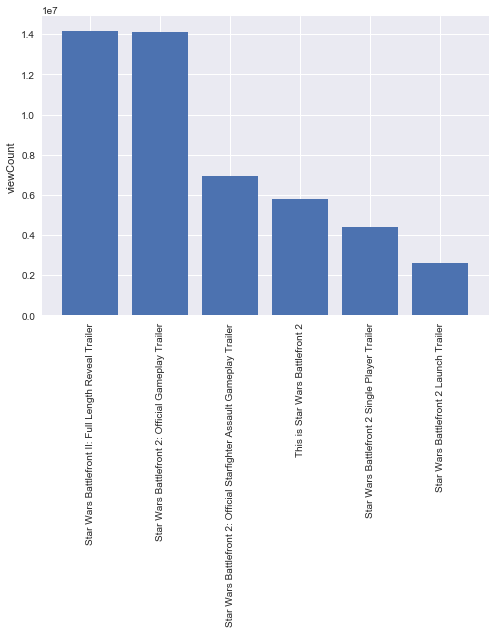

In [8]:
### Just a quick bar chart, the ways to play with the data is countless!

BattleFront2 = BattleFront2.sort_values(ascending=False,by='viewCount')
plt.bar(range(BattleFront2.shape[0]),BattleFront2['viewCount'])
plt.xticks(range(BattleFront2.shape[0]),BattleFront2['Title'],rotation=90)
plt.ylabel('viewCount')

plt.show()

# This block of code is another "youtube_search" that will show the data in a different way then above, this will look more like it would when gathering Twitter data in JSON format.  Once again, you would copy and paste this code  into a jupyter notebook and save as a different file than above.  Then download it into a py. file into the folder you are working out of!  Again, before downloading it into a py. file, replace what you want to replace and get rid of the text inbetween the hashtags including the hashtags themself. 

In [9]:
### Importing the new "youtube_search", also JSON since it will display in JSON format. ###
from youtube_geo import youtube_search
import json

# Below is the same search as before, but as you can see, a lot more information since in the code above we werent as specific.  If you examine the data, you can see that there is all types of data per video that was extracted.

In [10]:
test = youtube_search("Battle Front 2")
test

(u'CDIQAA',
 [{u'etag': u'"ld9biNPKjAjgjV7EZ4EKeEGrhao/17rcSDq2CCkU7QMk0sAJBSH5rbU"',
   u'id': {u'kind': u'youtube#video', u'videoId': u'FNUTWw17rkM'},
   u'kind': u'youtube#searchResult',
   u'snippet': {u'channelId': u'UCOsVSkmXD1tc6uiJ2hc0wYQ',
    u'channelTitle': u'EA Star Wars',
    u'description': u"Ignite the inferno and burn the Rebellion to the ground in Star Wars Battlefront 2's single-player campaign. Take on the role of Commander Iden Versio in a story ...",
    u'liveBroadcastContent': u'none',
    u'publishedAt': u'2017-10-19T13:00:09.000Z',
    u'thumbnails': {u'default': {u'height': 90,
      u'url': u'https://i.ytimg.com/vi/FNUTWw17rkM/default.jpg',
      u'width': 120},
     u'high': {u'height': 360,
      u'url': u'https://i.ytimg.com/vi/FNUTWw17rkM/hqdefault.jpg',
      u'width': 480},
     u'medium': {u'height': 180,
      u'url': u'https://i.ytimg.com/vi/FNUTWw17rkM/mqdefault.jpg',
      u'width': 320}},
    u'title': u'Star Wars Battlefront 2 Single Player Trai

In [11]:
just_json = test[1]
len(just_json)

50

In [12]:
### Here just displaing all of the titles of the videos that were extracted ###
for video in just_json:
    print video['snippet']['title']

Star Wars Battlefront 2 Single Player Trailer
STAR WARS BATTLEFRONT 2 Walkthrough Gameplay Part 1 - Iden - Campaign Mission 1 (BF2 Battlefront II)
BETA GAMEPLAY + TIPS - Star Wars Battlefront II
Star Wars Battlefront 2 Launch Trailer
STAR WARS BATTLEFRONT 2 - Multiplayer Gameplay
Star Wars Battlefront 2: Official Gameplay Trailer
This is Star Wars Battlefront 2
Battlefront 2: MULTIPLAYER GAMEPLAY Galactic Assault (Star Wars Battlefront II Full Official Game)
Star Wars Battlefront II: Full Length Reveal Trailer
Battlefront 2: MULTIPLAYER GAMEPLAY Beta & Giveaway (Star Wars Battlefront 2 Beta PS4 Gameplay)
Star Wars Battlefront 2 - ALL 14 HEROES GAMEPLAY!  Yoda, Kylo Ren, Darth Vader, Rey, Luke and More!
Star Wars Battlefront II Gameplay Live from EA Play (Battlefront 2 Multiplayer Gameplay LIVE)
Star Wars Battlefront 2 Multiplayer Gameplay
Star Wars Battlefront 2: All Era Space Battles - Clone Wars to the First Order
Star Wars Battlefront 2 Heroes VS Villians is EPIC!! - Gameplay Live S

# What we are doing below, is creating a dictionary of specific data we want to grab and then developing a block of code to extract all videos related to the search, stopping when it gets through the last page, therefore collecting more than 50 videos!

In [13]:
video_dict = {'youID':[], 'title':[], 'pub_date':[]}

In [14]:
def grab_videos(keyword, token=None):
    res = youtube_search(keyword, token=token)
    token = res[0]
    videos = res[1]
    for vid in videos:
        video_dict['youID'].append(vid['id']['videoId'])
        video_dict['title'].append(vid['snippet']['title'])
        video_dict['pub_date'].append(vid['snippet']['publishedAt'])
    print "added " + str(len(videos)) + " videos to a total of " + str(len(video_dict['youID']))
    return token

In [15]:
### This is using the 'while' function to go through the youtube pages, until it gets thorugh the "last_page".
token = grab_videos("Battle Front 2")
while token != "last_page":
    token = grab_videos("Battle Front 2", token=token)

added 50 videos to a total of 50
added 50 videos to a total of 100
added 50 videos to a total of 150
added 50 videos to a total of 200
added 50 videos to a total of 250
added 50 videos to a total of 300
added 50 videos to a total of 350
added 50 videos to a total of 400
added 50 videos to a total of 450
added 50 videos to a total of 500
added 37 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537
added 0 videos to a total of 537


In [25]:
### Pulling just the titles from the 537 videos we just collected from out dictionary ###
video_dict['title']

[u'Star Wars Battlefront 2 Single Player Trailer',
 u'STAR WARS BATTLEFRONT 2 Walkthrough Gameplay Part 1 - Iden - Campaign Mission 1 (BF2 Battlefront II)',
 u'BETA GAMEPLAY + TIPS - Star Wars Battlefront II',
 u'Star Wars Battlefront 2 Launch Trailer',
 u'STAR WARS BATTLEFRONT 2 - Multiplayer Gameplay',
 u'Star Wars Battlefront 2: Official Gameplay Trailer',
 u'This is Star Wars Battlefront 2',
 u'Battlefront 2: MULTIPLAYER GAMEPLAY Galactic Assault (Star Wars Battlefront II Full Official Game)',
 u'Star Wars Battlefront II: Full Length Reveal Trailer',
 u'Battlefront 2: MULTIPLAYER GAMEPLAY Beta & Giveaway (Star Wars Battlefront 2 Beta PS4 Gameplay)',
 u'Star Wars Battlefront 2 - ALL 14 HEROES GAMEPLAY!  Yoda, Kylo Ren, Darth Vader, Rey, Luke and More!',
 u'Star Wars Battlefront II Gameplay Live from EA Play (Battlefront 2 Multiplayer Gameplay LIVE)',
 u'Star Wars Battlefront 2 Multiplayer Gameplay',
 u'Star Wars Battlefront 2: All Era Space Battles - Clone Wars to the First Order',


In [17]:
### Pulling the "pub_date" from each of the videos ###
video_dict['pub_date']

[u'2017-10-19T13:00:09.000Z',
 u'2017-11-08T22:34:51.000Z',
 u'2017-10-03T15:57:56.000Z',
 u'2017-10-30T16:26:00.000Z',
 u'2017-06-10T19:44:39.000Z',
 u'2017-06-10T19:53:25.000Z',
 u'2017-09-26T13:00:04.000Z',
 u'2017-11-09T01:17:33.000Z',
 u'2017-04-15T18:39:59.000Z',
 u'2017-10-04T23:20:53.000Z',
 u'2017-11-01T21:47:34.000Z',
 u'2017-06-10T20:50:11.000Z',
 u'2017-06-10T20:30:01.000Z',
 u'2017-11-11T22:59:59.000Z',
 u'2017-11-09T23:49:45.000Z',
 u'2017-08-19T16:00:02.000Z',
 u'2017-11-11T18:00:07.000Z',
 u'2017-11-09T02:49:06.000Z',
 u'2017-10-09T06:31:13.000Z',
 u'2017-11-05T21:49:46.000Z',
 u'2017-11-08T13:00:00.000Z',
 u'2017-10-06T18:37:17.000Z',
 u'2017-10-05T02:26:19.000Z',
 u'2017-10-19T17:43:24.000Z',
 u'2017-11-08T13:00:42.000Z',
 u'2017-11-08T23:02:54.000Z',
 u'2017-11-11T20:34:04.000Z',
 u'2017-11-08T13:00:02.000Z',
 u'2017-11-09T13:20:29.000Z',
 u'2017-06-12T04:04:23.000Z',
 u'2017-11-10T20:01:08.000Z',
 u'2017-11-08T22:06:46.000Z',
 u'2017-11-10T23:17:21.000Z',
 u'2017-11

In [18]:
### This code here is using the same "youtube_search" function, but putting in some parameters for location 
### In this, we are extracting the videos related to "Battle Front 2", within 200 miles of the Manhattan, Kansas area!

test = youtube_search("Battle Front 2", location="39.1836, -96.5717", location_radius="200mi")
test

(u'CDIQAA',
 [{u'etag': u'"ld9biNPKjAjgjV7EZ4EKeEGrhao/xi2KItizzkTFop4Bnup8bWv1WzY"',
   u'id': {u'kind': u'youtube#video', u'videoId': u'q_NclusOrsw'},
   u'kind': u'youtube#searchResult',
   u'snippet': {u'channelId': u'UCbk2FgaqZ2ZHJAdrrclTqtg',
    u'channelTitle': u'MaDz Gaming',
    u'description': u'Star Wars Battlefront 2 - XBOX ONE X vs PS4 PRO Graphics Comparison Check the Latest News: ...',
    u'liveBroadcastContent': u'none',
    u'publishedAt': u'2017-11-10T02:30:00.000Z',
    u'thumbnails': {u'default': {u'height': 90,
      u'url': u'https://i.ytimg.com/vi/q_NclusOrsw/default.jpg',
      u'width': 120},
     u'high': {u'height': 360,
      u'url': u'https://i.ytimg.com/vi/q_NclusOrsw/hqdefault.jpg',
      u'width': 480},
     u'medium': {u'height': 180,
      u'url': u'https://i.ytimg.com/vi/q_NclusOrsw/mqdefault.jpg',
      u'width': 320}},
    u'title': u'Star Wars Battlefront 2 - XBOX ONE X vs PS4 PRO Graphics Comparison'}},
  {u'etag': u'"ld9biNPKjAjgjV7EZ4EKeEGrhao

In [19]:
### With this code, you are importing the "geo_query" from the initail .py file.
### With the "geo_query" you plug in the "videoID" 
from youtube_geo import geo_query
geo_test = geo_query('hcld5Tci7Vc')
geo_test

{u'etag': u'"ld9biNPKjAjgjV7EZ4EKeEGrhao/GYDLYZV_IL9g4jbEt8RCx3y1CIU"',
 u'items': [{u'etag': u'"ld9biNPKjAjgjV7EZ4EKeEGrhao/RshKi4bHTM8HDKg0zdS0gwv-g_U"',
   u'id': u'hcld5Tci7Vc',
   u'kind': u'youtube#video',
   u'recordingDetails': {u'location': {u'altitude': 0.0,
     u'latitude': 37.0902404785,
     u'longitude': -95.712890625},
    u'recordingDate': u'2017-10-04T00:00:00.000Z'},
   u'snippet': {u'categoryId': u'20',
    u'channelId': u'UCidP2JUrfwr59oY88LsHaVg',
    u'channelTitle': u'SidAlpha',
    u'defaultAudioLanguage': u'en',
    u'description': u"https://twitter.com/SidAlpha\nhttps://patreon.com/SidAlpha\n\nIn yet another surprising move, Disney has decided to revitalize Star Wars: Battlefront 2 by bringing back it's Multiplayer on Steam and GOG.",
    u'liveBroadcastContent': u'none',
    u'localized': {u'description': u"https://twitter.com/SidAlpha\nhttps://patreon.com/SidAlpha\n\nIn yet another surprising move, Disney has decided to revitalize Star Wars: Battlefront 2 b

In [20]:
### Here you doing what we did before, creating a dictionary with the specific data that we want using the "geo_query" function.

location_dict = {"youID":[], "lat":[], "lon":[]}
for video in test[1]:
    location_dict['youID'].append((video['id']['videoId']))
    geo = geo_query(video['id']['videoId'])
    location_dict['lat'].append(geo['items'][0]['recordingDetails']['location']['latitude'])
    location_dict['lon'].append(geo['items'][0]['recordingDetails']['location']['longitude'])

In [23]:
print location_dict[('lat')]

[37.0902404785, 37.0902404785, 37.0902404785, 37.0902404785, 37.0902404785, 37.09024, 37.0902404785, 37.0902404785, 37.09024, 37.09024, 37.0902404785, 37.0902404785, 37.0902404785, 37.0902404785, 39.102481842, 37.09024, 37.0902404785, 37.0902404785, 37.0902404785, 37.09024, 41.878, 37.0902404785, 37.0902404785, 37.3195610046, 37.09024, 38.26813, 37.09024, 37.09024, 39.14777, 37.0902404785, 37.0902404785, 37.09024, 37.0902404785, 37.0902404785, 37.09024, 37.0902404785, 37.0902404785, 37.0902404785, 37.09024, 37.0902404785, 37.09024, 37.09024, 41.77131167976406, 37.0902404785, 39.0911216736, 39.0997314453, 37.0902404785, 39.102481842, 37.09024, 37.0902404785]


In [24]:
print location_dict['lon']

[-95.712890625, -95.712890625, -95.712890625, -95.712890625, -95.712890625, -95.71289, -95.712890625, -95.712890625, -95.71289, -95.71289, -95.712890625, -95.712890625, -95.712890625, -95.712890625, -94.4079208374, -95.712891, -95.712890625, -95.712890625, -95.712890625, -95.71289, -93.0977, -95.712890625, -95.712890625, -100.154426575, -95.71289, -92.58363, -95.71289, -95.71289, -94.56751, -95.712890625, -95.712890625, -95.712891, -95.712890625, -95.712890625, -95.71289, -95.712890625, -95.712890625, -95.712890625, -95.71289, -95.712890625, -95.712891, -95.71289, -93.8671875, -95.712890625, -94.415512085, -94.5785675049, -95.712890625, -94.4079208374, -95.71289, -95.712890625]


# With the information that is provided within this tutorial, you can conduct multiple different analysis with the numeric values and text values.  Now, it is time for you to play around with some more code to grab more specific data and to create valuable information from the second biggest social media platform!  Google developers website will provide you with further information and more code.  Also, thanks to Pres Nichols and Sudharsan Asaithambi for providing invaluable assistance! 